In [2]:
import pandas as pd
import numpy as np
import spotipy
import SpotipyWrapper


In [3]:
help(SpotipyWrapper)

Help on module SpotipyWrapper:

NAME
    SpotipyWrapper

CLASSES
    builtins.object
        WrapperClass
    
    class WrapperClass(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  doAuth(self)
     |      Funtion: Setup and initialization of credentials manager and 
     |      master Spotify object
     |      
     |      Returns: Spotify Object
     |  
     |  getName(self, results, nameArr)
     |  
     |  getSongsFromPlaylist(self, uri, username, name='')
     |      Function: Get list of songs from certain playlist
     |      
     |      Returns: Dataframe containing [song name, uri]
     |  
     |  getUsersPlaylists(self, username='mikeydays')
     |      Function: Get a list of users playlist names
     |      
     |      Returns: A list of names
     |  
     |  ----------------------------------------------------------------------
     |  Data des

In [4]:
wrapper = SpotipyWrapper.WrapperClass()
sp = wrapper.doAuth()

In [5]:

playlistDF = wrapper.getUsersPlaylists('mikeydays')
playlistDF


,name,uri
0,wholesome bangers,52Z4shkqqeHL1AzX1NUgzY
1,Throwback Dingers,6v3WpQVrQbgfpU2EVxm3eW
2,eminem,2Zfrz2ddkRw64NSG3nRsf3
3,not country,3EaIcfySntnbcOWrBAnb96
4,country,0ZB9jG1uyCbs4rnQ1V5ro6


In [6]:
artistsDF = pd.read_csv('artist-uris.csv')
artistsDF.columns=['name', 'uri']
artistsDF['uri'] = artistsDF['uri'].apply(lambda uri: uri.split(':')[2])

artistsDF

,name,uri
0,2:00 AM,4tN3rZ7cChj4Wns2Wt2Nj6
1,2:15,4HsOm6VNKZtGh8W8GhdNu4
2,2:54,3LsQKoRgMc8VEkQn66jfAQ
3,4:20,5KCG0FDMDPzQpxcohGUnyH
4,6:30,5abblGojcZoe3zZBhJFBUi
...,...,...
81317,黃曉明,53F8atvCmVFVOvnKwZXBd3
81318,黃玠瑋,6VI0p0xTjBKKxQN8i8vGpD
81319,黃義達,7kaq0LysuRSgBZSorlZ7Vj
81320,黃顯忠 (Huang Xianzhong),7MuuEryyseo5cvReO6gdPF


In [7]:
uri = playlistDF[playlistDF['name'] == 'country']['uri'].values[0]

songsDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
songsDF

,name,uri,genres
0,I Love This Life,5d0iu7Mc64GwJIMBGjDt2U,"[contemporary country, country pop, country ra..."
1,Sunday Morning,0BzIw053LdsgAu8Sb1baIn,"[contemporary country, country, country pop, c..."
2,Sun Daze,0El2Zyt68nYySFDG87hZgM,"[dance pop, hip hop, pop rap, rap, southern hi..."
3,"Courtesy Of The Red, White And Blue (The Angry...",0M7mWKqwTIaVjYyxfZmtTa,"[contemporary country, country, country road, ..."
4,Loving You Easy,4ieqNz8S9pvnA0inetRkE3,"[contemporary country, country, country road, ..."
...,...,...,...
377,Hell Of A View,1kBx9VGumfuvlfqdlAGorE,"[contemporary country, country, country road]"
378,"Bartenders, etc...",2JyMIeTAb4bGOFa49qFG5y,"[contemporary country, country, country road, ..."
379,Joe Bought a Bar,7vCgVAQ0VFf8EqDCfgJK1Y,"[contemporary country, country rap, redneck]"
380,Is Anybody Loving You These Days,69u3mt4KCFagJZFmJ3Ged6,"[contemporary country, country, country road, ..."


In [8]:
len(songsDF['name'].unique())
# len(songsDF['name'])

379

In [9]:
id = artistsDF.loc[artistsDF['name'] == 'DaBaby']['uri'].values[0]

sp.artist_top_tracks(id)

//api.spotify.com/v1/artists/4r63FhuTkUYltbVAg5TQnk',
      'id': '4r63FhuTkUYltbVAg5TQnk',
      'name': 'DaBaby',
      'type': 'artist',
      'uri': 'spotify:artist:4r63FhuTkUYltbVAg5TQnk'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/623PL2MBg50Br5dLXC9E9e'},
    'href': 'https://api.spotify.com/v1/albums/623PL2MBg50Br5dLXC9E9e',
    'id': '623PL2MBg50Br5dLXC9E9e',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b27320e08c8cc23f404d723b5647',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e0220e08c8cc23f404d723b5647',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d0000485120e08c8cc23f404d723b5647',
      'width': 64}],
    'name': 'BLAME IT ON BABY',
    'release_date': '2020-04-17',
    'release_date_precision': 'day',
    'total_tracks': 13,
    'type': 'album',
    'uri': 'spotify:album:623PL2MBg50Br5dLXC9E9e'},
   'artists': [{'external_u

In [9]:
names = []

featureList = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
valence = []
popularity = []
timeSignature = []

for index, row in songsDF.iterrows():
    uri = row['uri']
    if(not isinstance(uri, str)):
        continue
    name = row['name']
    features = sp.audio_features(uri)
    if features != [None]:
        names.append(name)
        print(name)
        acousticness.append(features[0]['acousticness'])
        danceability.append(features[0]['danceability'])
        energy.append(features[0]['energy'])
        instrumentalness.append(features[0]['instrumentalness'])
        liveness.append(features[0]['liveness'])
        loudness.append(features[0]['loudness'])
        speechiness.append(features[0]['speechiness'])
        tempo.append(features[0]['tempo'])
        valence.append(features[0]['valence'])
        timeSignature.append(features[0]['time_signature'])



        # popularity.append(features[0]['popularity'])

data = {
    'name' : names,
    'acousticness' : acousticness,
    'danceability' : danceability,
    'energy' : energy,
    'instrumentalness' : instrumentalness,
    'liveness' : liveness,
    'loudness' : loudness,
    'speechiness' : speechiness,
    'tempo' : tempo,
    'valence' : valence,
    'timeSignature' : timeSignature
    
}

audioFeaturesDF = pd.DataFrame(data)
audioFeaturesDF


I Love This Life
Sunday Morning
Sun Daze
Courtesy Of The Red, White And Blue (The Angry American)
Loving You Easy
Speakers, Bleachers And Preachers
Power of Positive Drinkin'
I Don't Want This Night To End
Broken Halos
Hotel Key
Night Shift
Most People Are Good
Tequila
Small Town
Born to Love You
Simple
Colorado
Sixteen
Nowhere Fast
Shotgun Rider
Where The Green Grass Grows
Just To See You Smile
Top Of The World
Whiskey Glasses
Get Along
Up All Night
Burning Man
Midnight Lovers
You're In It
The Gator Boys - iHeart Radio Live
Texas Lullaby
Kiss That Girl Goodbye
One Man Band
Every Little Honky Tonk Bar
You Look So Good In Love
Should've Been A Cowboy
Just Another Day In Paradise
Beautiful Crazy
I Love This Bar
Check Yes Or No
She Used to Be Mine
Dust On The Bottle
Diamond In My Pocket
Lonely For You Only
Drinkin' Problem
At Least You Cried
Burn Out
Wake up Loving You
If You Ain't Here To Party
Beer Can
Mr. Lonely
Break Up in the End
Boys 'Round Here (feat. Pistol Annies & Friends)
Mr. M

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
...,...,...,...,...,...,...,...,...,...,...,...
377,Hell Of A View,0.11900,0.689,0.582,0.004640,0.1010,-6.778,0.0236,99.021,0.883,4
378,"Bartenders, etc...",0.02320,0.583,0.838,0.000004,0.1550,-6.963,0.0369,81.454,0.834,4
379,Joe Bought a Bar,0.14600,0.516,0.914,0.000000,0.2130,-4.510,0.1090,146.101,0.485,4
380,Is Anybody Loving You These Days,0.06610,0.699,0.573,0.000005,0.2290,-8.773,0.0276,119.908,0.618,4


In [11]:
import os

username = 'mikeydays'
playlist = 'country'

path = './Data/{}/{}'.format(username, playlist)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'SongFeatures.csv')    
audioFeaturesDF.to_csv(csvPath, index=False)
# audioFeaturesDF.to_csv(r'./{}/{}/SongFeatures.csv'.format('mikeydays', 'country'))

In [12]:
audioFeaturesDF = pd.read_csv(csvPath)

In [12]:
audioFeaturesDF.corr(method='kendall')

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
acousticness,1.000000,0.070370,-0.425098,0.049613,-0.113523,-0.350427,-0.072105,-0.040954,-0.186785,-0.125231
danceability,0.070370,1.000000,-0.070096,0.021216,0.033799,-0.105998,-0.125128,-0.215371,0.176523,0.130868
energy,-0.425098,-0.070096,1.000000,-0.123369,0.188959,0.555494,0.252053,0.102709,0.368153,0.167377
instrumentalness,0.049613,0.021216,-0.123369,1.000000,-0.021875,-0.207921,-0.086933,-0.039920,-0.096176,-0.011756
liveness,-0.113523,0.033799,0.188959,-0.021875,1.000000,0.116532,0.097186,0.029066,0.139577,0.021052
loudness,-0.350427,-0.105998,0.555494,-0.207921,0.116532,1.000000,0.133413,0.112984,0.213404,0.069058
speechiness,-0.072105,-0.125128,0.252053,-0.086933,0.097186,0.133413,1.000000,0.107424,0.127494,0.062348
tempo,-0.040954,-0.215371,0.102709,-0.039920,0.029066,0.112984,0.107424,1.000000,0.046845,-0.095932
valence,-0.186785,0.176523,0.368153,-0.096176,0.139577,0.213404,0.127494,0.046845,1.000000,0.172895
timeSignature,-0.125231,0.130868,0.167377,-0.011756,0.021052,0.069058,0.062348,-0.095932,0.172895,1.000000


In [13]:
import altair as alt

source = pd.DataFrame(audioFeaturesDF.drop(columns=['timeSignature', 'tempo', 'loudness']))
source = pd.DataFrame(source.mean(axis=0), columns=['Mean']).reset_index()
alt.Chart(source).mark_bar().encode(x='index', y='Mean')
# source

alt.Chart(...)

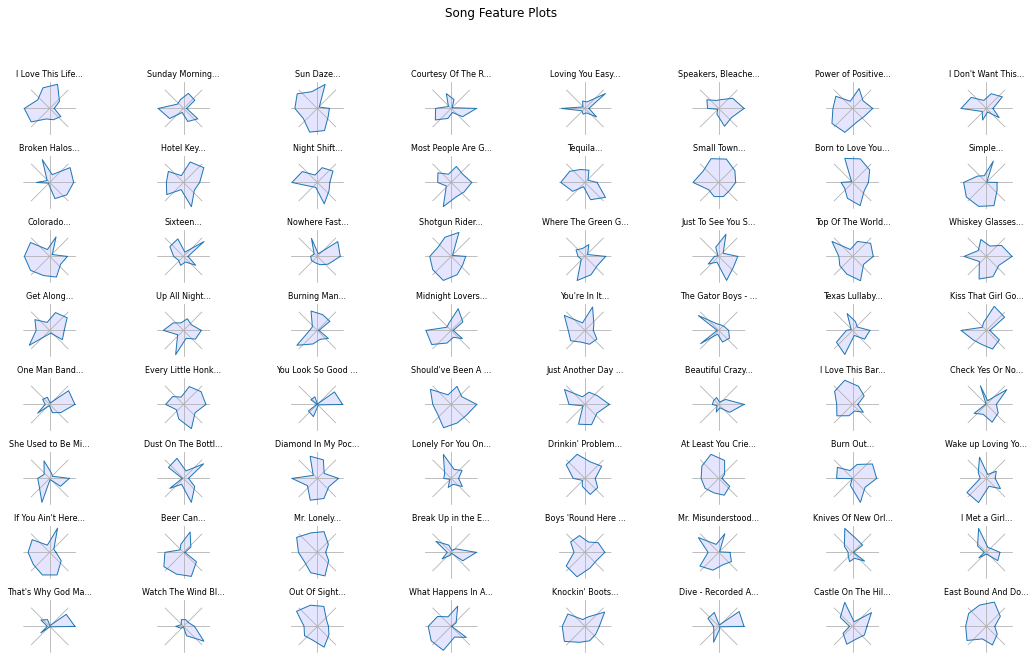

In [16]:
import matplotlib.pyplot as plt
import math
# matplotlib.use('TkAgg')
%matplotlib inline


def create_spider(df, x, y, ax, subs, final = False):
    # Libraries
    
    # number of variable
    temp = df.drop(["name"], axis=1)
    normalized_df=temp.rank(pct = True)
    categories= list(normalized_df)
    N = len(categories)
    
    subs = subs
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:

    ax.set_title(str(df['name'].iloc[x * subs + y][:17]) + '...', fontsize=8)
    values= normalized_df.iloc[x * subs + y].values.flatten().tolist()
    values += values[:1]
    values
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
 
   
    
    # Draw one axe per variable + add labels
    if final:
        ax.set_title(df['name'].iloc[x * subs + y],fontsize=16)
        plt.xticks(angles[:-1], categories, color='Black', size=10)
        
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # ax.set_ylim([0,1])
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    return plt


def spiders(df, subs):
    # Initialise the spider plot
    temp = df.drop(["name"], axis=1)
    normalized_df=temp.rank(pct = True)
    categories= list(normalized_df)
    N = len(categories)

    fig, axes = plt.subplots(subs, subs, subplot_kw=dict(polar=True))
    fig.suptitle("Song Feature Plots")
    fig.set_size_inches(18.5, 10.5)
    x = y = 0
    
    for axisRow in axes:
        for ax in axisRow:  
            ax.set_title(temp.iloc[x,y])    
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.yaxis.grid(False)
            ax.spines['polar'].set_visible(False)
            create_spider(df, x, y,ax, subs)
            
        
        
            y += 1  
            y = y%subs
        x += 1
        x %= subs

    plt.savefig('spiderPlots.png')
    plt.subplots_adjust(wspace = .4, hspace = .4)
    # fig.tight_layout()

    # new_ax = plt.subplot(111, polar=True)

    # create_spider(df, 0, 0, new_ax, True).show()

spiders(audioFeaturesDF[:64], 8)


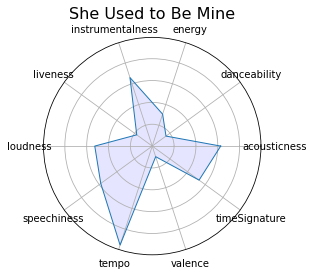

In [17]:



new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
create_spider(audioFeaturesDF[:], 5, 0, new_ax, 8, True).show()
